## Figure 4 (a-b) - Distribution of depths of shallow sources @ Shinmoe-dake

In [1]:
%matplotlib inline
import os
from datetime import timedelta, datetime as dt
import h5py
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt, ticker, dates as mdates
from mintpy.utils import ptime, readfile, writefile, utils as ut, plot as pp
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/depths_PDF')
os.chdir(work_dir)
print('Go to directory', work_dir)

inv_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/model')

Go to directory /Users/yunjunz/Papers/2021_Kirishima/figs_src/depths_PDF


In [2]:
## Utilities function
def read_GBIS_depth(inv_file, model_code, burning=3e4, blankCells=9999, unit='km', ref_height=None):
    """ Get the estimation of the parameter
    Depth in GBIB is relative to mean sea level with positive downward.

    Parameters: inv_file : GBIS inversion result mat file
                model_code : index of the parameter, starting from 0
                burning : number of iterations to ignore in pdf histogram plot
                blankCells : Number of empty cells at the end of mKeep and pKeep
                offset : reference height
    Returns:    mKeep : 1D np.ndarray of all the estimation of the parameter
                optimal : the optional value
    """
    par_name = '{} Depth'.format(model_code2name[model_code])
    mat = sio.loadmat(inv_file, struct_as_record=False, squeeze_me=True)
    par_idx = list(mat['invResults'].model.parName).index(par_name)
    mKeep = mat['invResults'].mKeep[par_idx, int(burning):-blankCells]
    optimal = mat['invResults'].model.optimal[par_idx]

    ## convert to positive upward
    mKeep *= -1
    optimal *= -1

    if ref_height is not None:
        print('read depth with respect to {} m with positive downward'.format(ref_height))
        mKeep = ref_height - mKeep
        optimal = ref_height - optimal

    if unit == 'km':
        print('output depth in unit of km')
        mKeep *= 0.001
        optimal *= 0.001

    # stats for plot
    dmin = np.nanmean(mKeep) - 4 * np.nanstd(mKeep)
    dmax = np.nanmean(mKeep) + 4 * np.nanstd(mKeep)

    return mKeep, optimal, dmin, dmax


model_code2name = {
    'C' : 'CDMN',
    'C2': 'CDM2',
    'T' : 'MCTG',
}

print('Utilities function intiated.')

Utilities function intiated.


### Depth PDF of pressure sources beneath Shinmoe-dake

read depth with respect to 1421 m with positive downward
output depth in unit of km
read depth with respect to 1421 m with positive downward
output depth in unit of km
save figure to /Users/yunjunz/Papers/2020_Kirishima/figs_src/depths_PDF/depths_PDF_Shinmoe.png


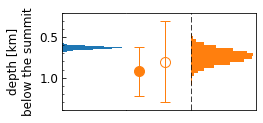

In [4]:
## plot
refH = 1421  #height of Shinmoe-dake in m
inv_files = [os.path.join(inv_dir, i) for i in ['Shinmoe2008post/invert_1_2_C/invert_1_2_C.mat', 
                                                'Shinmoe2017pre/invert_1_2_T/invert_1_2_T.mat']]
ds_names = [os.path.splitext(os.path.basename(i))[0] for i in inv_files]
m_codes = [i.split('invert_1_2_')[1].split('_')[-1] for i in ds_names]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[3, 1.5])
# 2008-2010 and 2014-2017
for i, ax in enumerate([axs[0], axs[2]]):
    depths, depthO, dmin, dmax = read_GBIS_depth(inv_files[i], m_codes[i], burning=3e4, ref_height=refH)
    ax.hist(depths, bins=20, range=(dmin, dmax), color=pp.mplColors[i], orientation='horizontal', density=True)
# 2011-2013 from other literacture
ax = axs[1]
kwargs = dict(fmt='o', ms='10', color=pp.mplColors[1], elinewidth=1, capsize=5)
ax.errorbar(x=0.2, y=refH/1000-0.500, yerr=0.300, fillstyle='full', **kwargs)
ax.errorbar(x=0.6, y=refH/1000-0.620, yerr=0.500, fillstyle='none', **kwargs)
ax.set_xlim(0,1)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=False, top=False, left=True, right=False)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.500))
    ax.set_xticks([])
    ax.invert_yaxis()
    ax.set_ylim(1.400, 0.200)
axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.100))
axs[0].set_ylabel('depth [km]\nbelow the summit', fontsize=font_size)
for ax in axs[0:2]:
    ax.spines['right'].set_visible(False)
    ax.tick_params(right=False)
for ax in axs[1:3]:
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False)
    ax.set_yticks([])
axs[2].plot((0,0), (0,1), '--', transform=axs[2].transAxes, color='k')
fig.subplots_adjust(wspace=0, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('depths_PDF_Shinmoe.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

### Depth PDF of pressure sources beneath Iwo-yama

read depth with respect to 1313 m with positive downward
output depth in unit of km
read depth with respect to 1313 m with positive downward
output depth in unit of km
read depth with respect to 1313 m with positive downward
output depth in unit of km
save figure to /Users/yunjunz/Papers/2020_Kirishima/figs_src/depths_PDF/depths_PDF_Iwo.png


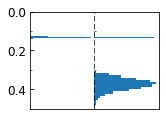

In [9]:
# inversion dataset
refH = 1313 #height of Iwo-yama in m
inv_files = [os.path.join(inv_dir, i) for i in ['Iwo2017pre/invert_1_2_C/invert_1_2_C.mat', 
                                                'Iwo2017post/invert_1_2_C_C2/invert_1_2_C_C2.mat']]
ds_names = [os.path.splitext(os.path.basename(i))[0] for i in inv_files]
m_codes = [i.split('invert_1_2_')[1].split('_')[-1] for i in ds_names]

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[2, 1.5], sharey=True)
for i, ax in enumerate(axs):
    depths, depthO, dmin, dmax = read_GBIS_depth(inv_files[i], m_codes[i], burning=3e4, ref_height=refH)
    ax.hist(depths, bins=20, range=(dmin, dmax), color=pp.mplColors[0], orientation='horizontal', density=True)
    if ds_names[i] == 'invert_1_2_C_C2':
        depthO = read_GBIS_depth(inv_files[i], 'C', burning=3e4, ref_height=refH)[1]
        ax.axhline(y=depthO, xmax=0.9, c=pp.mplColors[0], linestyle='-', linewidth=1)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=False, top=False, left=True, right=False)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.200))
    ax.set_xticks([])
    ax.invert_yaxis()
    ax.set_ylim(0.5, 0.0)
axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.100))
axs[0].spines['right'].set_visible(False)
#axs[0].tick_params(labelleft=True)
axs[1].tick_params(left=False)
axs[1].spines['left'].set_visible(False)
axs[1].plot((0,0), (0,1), '--', transform=axs[1].transAxes, color='k')
fig.subplots_adjust(wspace=0, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('depths_PDF_Iwo.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

## Obsolete

save figure to /Users/yunjunz/Papers/2020_Kirishima/figs_src/depths_PDF/depths_PDF.png


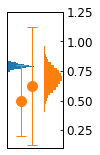

In [52]:
# inversion dataset
inv_dir = os.path.expanduser('~/Papers/2020_Kirishima/figs_src/data/GBIS')
inv_files = [os.path.join(inv_dir, i) for i in ['Shinmoe2008post/invert_1_2_C/invert_1_2_C.mat', 
                                                'Shinmoe2017pre/invert_1_2_T/invert_1_2_T.mat']]
ds_names = [os.path.splitext(os.path.basename(i))[0] for i in inv_files]
m_codes = [i.split('invert_1_2_')[1].split('_')[-1] for i in ds_names]
par_names = ['{} Depth'.format(model_code2name[i]) for i in m_codes]

# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[1, 2.5], sharey=True)

# 1: 2008-2010
depthDis, depthOpt, dmin, dmax = read_GBIS_depth(inv_files[0], par_name=par_names[0], burning=3e4, scale=0.001)
ax.hist(depthDis, bins=30, range=(dmin, dmax), color=pp.mplColors[0], orientation='horizontal', density=True)
xmax = ax.get_xlim()[1]
ax.set_xlim(0, 2*xmax)

# 2: 2011-2013 from other literacture
ax2 = ax.twiny()
kwargs = dict(fmt='o', fillstyle='full', ms='10', color=pp.mplColors[1], elinewidth=1, capsize=5)
ax2.errorbar(x=0.25, y=0.50, yerr=0.3, **kwargs)
ax2.errorbar(x=0.45, y=0.62, yerr=0.5, **kwargs)
ax2.set_xlim(0,1)

# 3: 2014-2017
ax3 = ax.twiny()
depthDis, depthOpt, dmin, dmax = read_GBIS_depthread_GBIS_mKeep(inv_files[1], par_name=par_names[1], burning=3e4, scale=0.001)
ax3.hist(depthDis, bins=30, range=(dmin, dmax), color=pp.mplColors[1], orientation='horizontal', density=True)
xmax = ax3.get_xlim()[1]
ax3.set_xlim(-2*xmax, xmax)

# axis format
for ax in [ax, ax2, ax3]:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=False, top=False, left=False, right=True)
    ax.set_xticks([])
    ax.yaxis.tick_right()
    ax.set_ylim(0.10, 1.25)
#kwargs = dict(transform=ax3.transAxes, color='k')
#ax3.plot((0,0), (0,1), '--', **kwargs)

# output
out_file = os.path.abspath('depths_PDF.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

save figure to /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/depths_PDF/timeline.png


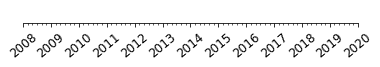

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6,0.3])

ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(which='both', direction='out', rotation=40, labelsize=font_size, bottom=True, top=False, left=False, right=False)
ax.set_xlim(dt(2008, 1, 1), dt(2020, 1, 1))

# xaxis format
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=2))

# output
out_file = os.path.abspath('timeline.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

save figure to /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/depths_PDF/depths_PDF.png


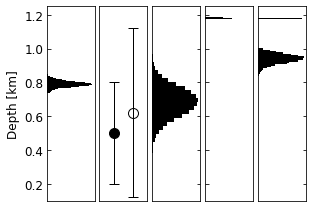

In [6]:
## plot

# inversion result dir
inv_res_dir = os.path.expanduser('~/Papers/2020_Kirishima/figs_src/data/GBIS')

# inversion dataset
ds_list = [
    'Shinmoe2008post/invert_1_2_C',
    'Shinmoe2017pre/invert_1_2_T',
    'Iwo2017pre/invert_1_2_C',
    'Iwo2017post/invert_1_2_C_C2',
]

colors = [pp.mplColors[0], pp.mplColors[1], pp.mplColors[2], pp.mplColors[3]]
axIdx = [0,2,3,4]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=[4, 3], sharey=True)
for i in range(len(ds_list)):
    ds_name = ds_list[i]
    ax = axs[axIdx[i]]
    c = colors[i]

    inv_file = ds_name.split('/')[1]
    inv_file = os.path.join(inv_res_dir, ds_name, inv_file)
    
    # read GBIS data
    model_code = ds_name.split('invert_1_2_')[1].split('_')[-1]
    model_name = model_code2name[model_code]
    par_name = '{} Depth'.format(model_name)
    
    depths, depthO = get_GBIS_mKeep(inv_file, par_name=par_name, burning=3e4, scale=0.001)
    dmin = np.nanmean(depths) - 4 * np.nanstd(depths)
    dmax = np.nanmean(depths) + 4 * np.nanstd(depths)

    # plot
    ax.hist(depths, bins=30, range=(dmin, dmax), color='k', orientation='horizontal', density=True)
    if ds_name == 'Iwo2017post/invert_1_2_C_C2':
        depthO = get_GBIS_mKeep(inv_file, par_name='CDMN Depth', burning=3e4, scale=0.001)[1]
        ax.axhline(y=depthO, xmax=0.9, c='k', linestyle='-', linewidth=1)

# depths from other literacture
ax = axs[1]
ax.errorbar(x=0.3, y=0.50, yerr=0.3, fmt='o', fillstyle='full', ms='10', color='k', elinewidth=1, capsize=5)
ax.errorbar(x=0.7, y=0.62, yerr=0.5, fmt='o', fillstyle='none', ms='10', color='k', elinewidth=1, capsize=5)
ax.set_xlim(0,1)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=False, top=False, left=True, right=True)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.200))
    #ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.050))
    ax.set_xticks([])
    ax.set_ylim(0.10, 1.25)
axs[0].set_ylabel('Depth [km]', fontsize=font_size)
for i in [1,2,4]:    axs[i].tick_params(left=False);
for i in [0,1,3]:    axs[i].tick_params(right=False);
#axs[-1].tick_params(labelright=True)
fig.subplots_adjust(wspace=0.1, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('depths_PDF.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()